# Multiple Extrema

In [19]:
%matplotlib inline
from network import *
from adsy.display import extended_styles
extended_styles()

Let's take a look at some results. First we create an organization with preset parameters

In [2]:
org1 = Organization(**parameters)

Now we train the organization and collect the results

In [3]:
res=org1.train(3000, 100, iplot=False)

We can not plot the organization structure

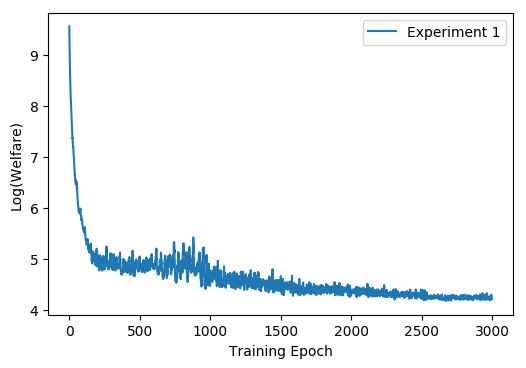

In [13]:
fig, ax = plt.subplots()
ax.plot(np.log(res.training_res), label="Experiment 1")
ax.set_xlabel("Training Epoch")
ax.set_ylabel("Log(Welfare)")
ax.legend()

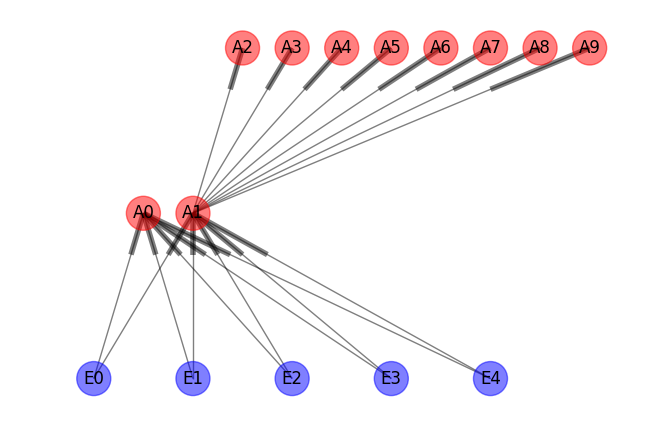

In [9]:
G=res.graph_org();

We can repeat the experiment again

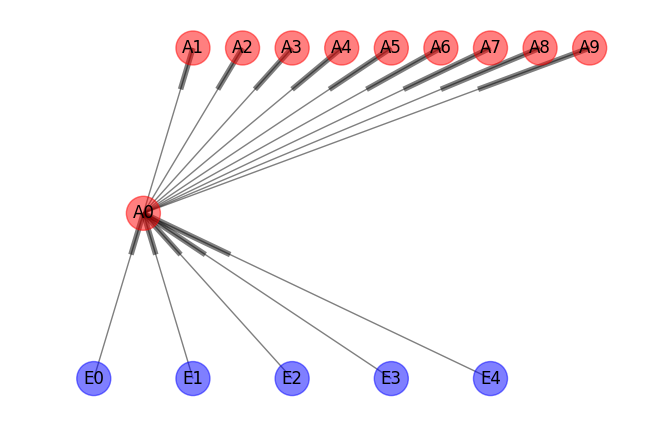

In [6]:
org2 = Organization(**parameters)
res2=org2.train(3000, 100, iplot=False)
G=res2.graph_org()

And we get a different network topology.  Let's see if it learned

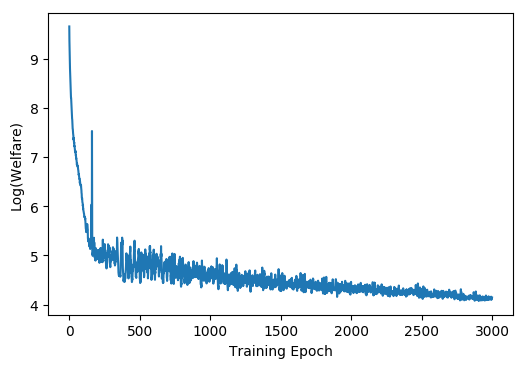

In [7]:
fig, ax = plt.subplots()
ax.plot(np.log(res2.training_res))
ax.set_xlabel("Training Epoch")
ax.set_ylabel("Log(Welfare)")

It certainly learned.  Let's see how it compared to the original learned topology

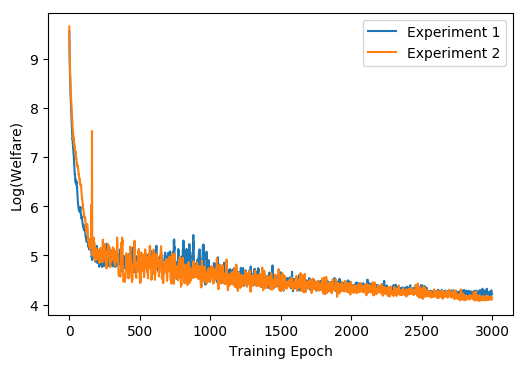

In [15]:
fig, ax = plt.subplots()
ax.plot(np.log(res.training_res), label="Experiment 1")
ax.plot(np.log(res2.training_res), label = "Experiment 2")
ax.set_xlabel("Training Epoch")
ax.set_ylabel("Log(Welfare)")
ax.legend()

Let's do it one more time:

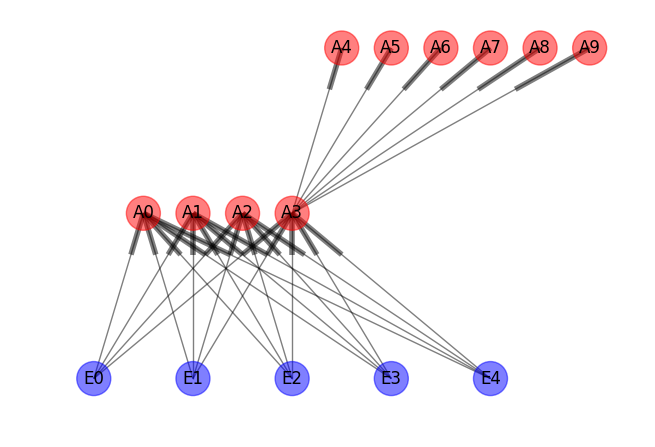

In [10]:
org3 = Organization(**parameters)
res3=org3.train(3000, 100, iplot=False)
G=res3.graph_org()

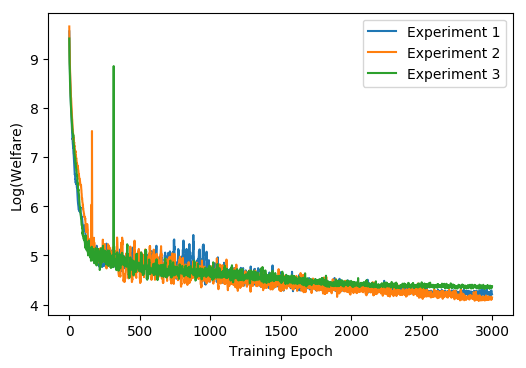

In [17]:
fig, ax = plt.subplots()
ax.plot(np.log(res.training_res), label="Experiment 1")
ax.plot(np.log(res2.training_res), label = "Experiment 2")
ax.plot(np.log(res3.training_res), label = "Experiment 3")
ax.set_xlabel("Training Epoch")
ax.set_ylabel("Log(Welfare)")
ax.legend()

### Summary

There are many local extrema points, though they all give similar social welfare (but not exactly the same) and accomplish the majority of the learning.  This results is not sensitive to:

* The functional form of the noise (normal or uniform)
* The number of agents
* The number of environment nodes
* The functional form of the regularizer ($L1$ vs $L2$ norm on an agent basis or an organization basis.)
* Realtive importance of welfare vs regularizer
* Parameters of the learning algorithm (optimizer, learning rate, decay, batch size, etc.)

###  Solution

In addition to the specifications I mention above, I don't think there is a way around the issue of multiple local extrema, even when we change the welfare function and use non-linear activation functions.  However, since it seems we are interested in hierarchy, we might be able to use some "summary statistic" that captures the notion of hierarchy that is more or less the same across all local optima.  Maybe something like "average path length from the environment node" would serve as a possible statistic. 

Any other ideas?